In [10]:
from skimage.io import imread
from skimage import measure
import numpy as np
from matplotlib import pyplot as plt

In [2]:
datadir = '/data/FB10_data/stage1_train/'

In [78]:
from skimage.segmentation import (
    watershed, relabel_sequential, 
    find_boundaries
)

import scipy
from skimage.feature import peak_local_max
def label_watershed(fgmask):
    
    distance = scipy.ndimage.distance_transform_edt(fgmask)
    coords = peak_local_max(distance, min_distance=11, footprint=np.ones((7, 7)))
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = scipy.ndimage.label(mask)
    return watershed(-distance, markers, mask=fgmask)

In [115]:
im = imread(datadir+'/images/17188.png')
annot = imread(datadir+'/masks/17188_annotated.png')

In [168]:
colors = [(0,0,255),(0,255,0),(148,0,211),(75,0,130),(255,255,0),(255,127,0),(255,0,0)]

In [169]:
sz = annot.shape

In [170]:
annot_labelmap = np.zeros(sz[:-1],np.uint8)

In [179]:
big_o={}
cell_masks = []
for ii,clr in enumerate(colors):
    mask = (annot[...,0]==clr[0]) & (annot[...,1]==clr[1]) & (annot[...,2]==clr[2])
#     plt.imshow(mask)
#     plt.show()
    msk_lbl = measure.label(mask)
    print(ii,msk_lbl.max())
    # regionprops etc
    props = measure.regionprops_table(msk_lbl,im[...,0],properties=('label','area','bbox_area'))
    big_o[ii] = props['label'][np.where(props['area']>100)]
    
    
    for jj in range(1,msk_lbl.max()+1):
        if jj not in big_o[ii]:
            cell_masks.append(msk_lbl==jj)

        else:
            # split            
            newlbl = label_watershed(msk_lbl==jj)
            for ll in range(1,newlbl.max()+1):
                cell_masks.append(newlbl==ll)
                    
# #     markers = cv2.drawContours(markers, [cnt], -1, i+1, cv2.FILLED)
#     if len( big_o[ii])>0:
#         continue

0 0
1 27
2 39
3 32
4 0
5 0
6 0


In [180]:
len(cell_masks)

131

In [185]:
np.array(cell_masks).shape[-1]

512

In [186]:
np.ones(512)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

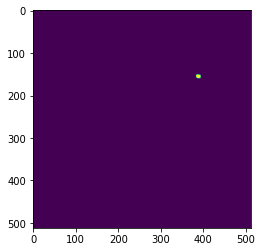

In [183]:
plt.imshow(cell_masks[65])

In [ ]:
max

In [178]:
big_o

{0: array([], dtype=int64),
 1: array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 21, 22, 23, 25, 26]),
 2: array([ 1,  3,  7,  8, 15, 17, 18, 21, 29, 30, 32, 34, 35]),
 3: array([ 2,  7,  8,  9, 15, 18, 19, 21, 24, 25, 27, 29, 31]),
 4: array([], dtype=int64),
 5: array([], dtype=int64),
 6: array([], dtype=int64)}

In [ ]:
# plt.figure(figsize=(512//72,512//72))
# msk_c = annot[...,0]==148
# msk_lbl = measure.label(msk_c)
ndimage.label(annot)
# mask = (annot[...,0]==14) & (annot[...,1]==clr[1]) & (annot[...,2]==clr[2])
# plt.imshow(mask==17)
# # plt.colorbar()

In [116]:
colors = np.unique(annot)

In [117]:
colors

array([  0,  75, 130, 148, 211, 255], dtype=uint8)

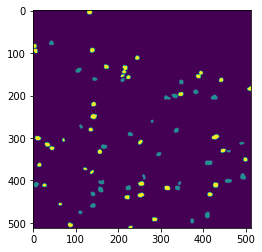

In [141]:
plt.imshow(annot[...,])

In [130]:
bigobjects = {}
for color in colors[1:]:
    msk_c = (annot[...,0] == color)
    msk_lbl = measure.label(msk_c)
    # regionprops etc
    props = measure.regionprops_table(msk_lbl,im[...,0],properties=('label','area','bbox_area'))
    bigobjects[color] = props['label'][np.where(props['area']>130)]
    if len(bigobjects[color])>0:
        continue

In [127]:
bigobjects

{75: array([ 8, 18, 19, 31]),
 130: array([], dtype=int64),
 148: array([ 7,  8, 15, 17]),
 211: array([], dtype=int64),
 255: array([], dtype=int64)}

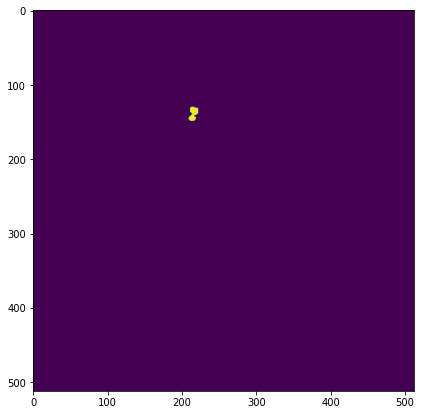

In [136]:
plt.figure(figsize=(512//72,512//72))
msk_c = annot[...,0]==148
msk_lbl = measure.label(msk_c)
plt.imshow(msk_lbl==7)
# plt.colorbar()

In [138]:
newlbl = label_watershed(msk_lbl==7)

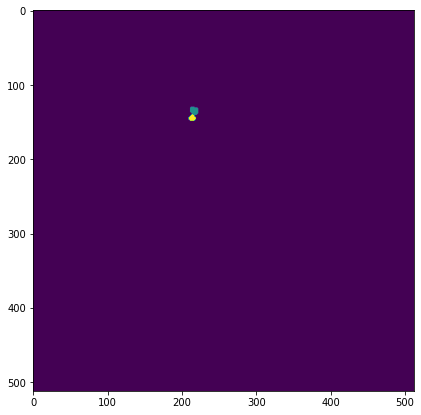

In [139]:
plt.figure(figsize=(512//72,512//72))
plt.imshow(newlbl)

In [140]:
np.unique(newlbl)

array([0, 1, 2], dtype=int32)

(array([1., 2., 3., 6., 7., 3., 2., 3., 2., 2.]),
 array([ 45. ,  55.4,  65.8,  76.2,  86.6,  97. , 107.4, 117.8, 128.2,
        138.6, 149. ]),
 <BarContainer object of 10 artists>)

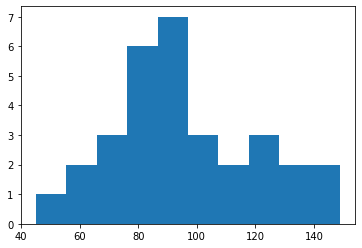

In [107]:
plt.hist(props['area'])


In [29]:
measure.regionprops?
